## Bibliotecas

In [1]:
import numpy as np
from datetime import datetime, timedelta
import pandas as pd

from sklearn.model_selection import GridSearchCV
from category_encoders import TargetEncoder
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
# obtendo cores do padrão Tableau

# Configurações iniciais

In [2]:
warnings.filterwarnings('ignore')

# definindo seed para reprodução dos mesmos resultados
seed = 10

# definindo os temas dos gráficos
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

# Coleta de Dados

In [3]:
df_inicial = pd.read_excel("base_completa_sem_filtro.xlsx", sheet_name="completo")

# Pré-processamento de Dados

Análise do tipo de dado presente

In [4]:
df_inicial.describe()

,Data de Embarque,Data PCP,Data de Entrega,Data Acordada,Data do Faturamento,Situação da Entrega,Situação do Pedido,LINHA,Pedido Terceiro,Terceiro Centralizador,...,Unidade,Peso Líquido Estimado,Peso Bruto Estimado,Volume Estimado,Peso Embarcado,Volume Embarcado,Limite Mínimo Embarque,Limite Máximo Embarque,Data de Cancelamento,Motivo de Cancelamento
count,37335,37054,37315,37315,28259,37315,37315,37315,14535,37315,...,37315,37315,37315,37315.000,27323,27323,36971,37314,1,1
unique,242,228,265,280,172,3,13,18,2046,203,...,4,713,717,756.000,5026,359,8,40,1,1
top,2023-04-27 00:00:00,2023-07-06 00:00:00,2023-04-14 00:00:00,2023-03-17 00:00:00,2023-04-28 00:00:00,Faturada,Faturado,CAJAMAR MOÍDA ATM,18304526,1042,...,CXS,15,15,1.734,30,1,0,3,Data de Cancelamento,Motivo de Cancelamento
freq,361,358,622,583,328,28258,28258,19518,177,9020,...,24727,4922,4922,4156.000,1678,6214,33815,18908,1,1


In [5]:
df_inicial.dtypes

Data de Embarque                  object
Data PCP                          object
Data de Entrega                   object
Data Acordada                     object
Data do Faturamento               object
Situação da Entrega               object
Situação do Pedido                object
LINHA                             object
Pedido Terceiro                   object
Terceiro Centralizador            object
Nome do Terceiro Centralizador    object
Código Terceiro                   object
Nome do Terceiro                  object
Cidade                            object
UF                                object
Pedido                            object
Data Emissão Pedido               object
Hora Emissão Pedido               object
Usuário Digitador                 object
Usuário Responsável               object
Código Instrução Filial           object
Data da Instrução                 object
Data Liberação Pedido             object
Placa do Veículo                  object
Produto         

In [6]:
df_inicial.columns

Index(['Data de Embarque', 'Data PCP', 'Data de Entrega', 'Data Acordada',
       'Data do Faturamento', 'Situação da Entrega', 'Situação do Pedido',
       'LINHA', 'Pedido Terceiro', 'Terceiro Centralizador',
       'Nome do Terceiro Centralizador', 'Código Terceiro', 'Nome do Terceiro',
       'Cidade', 'UF', 'Pedido', 'Data Emissão Pedido', 'Hora Emissão Pedido',
       'Usuário Digitador', 'Usuário Responsável', 'Código Instrução Filial',
       'Data da Instrução', 'Data Liberação Pedido', 'Placa do Veículo',
       'Produto', 'Nome Produto', 'Qtde', 'Unidade', 'Peso Líquido Estimado',
       'Peso Bruto Estimado', 'Volume Estimado', 'Peso Embarcado',
       'Volume Embarcado', 'Limite Mínimo Embarque', 'Limite Máximo Embarque',
       'Data de Cancelamento', 'Motivo de Cancelamento'],
      dtype='object')

In [7]:
df_inicial.shape

(37335, 37)

In [8]:
df_inicial.isnull()

,Data de Embarque,Data PCP,Data de Entrega,Data Acordada,Data do Faturamento,Situação da Entrega,Situação do Pedido,LINHA,Pedido Terceiro,Terceiro Centralizador,...,Unidade,Peso Líquido Estimado,Peso Bruto Estimado,Volume Estimado,Peso Embarcado,Volume Embarcado,Limite Mínimo Embarque,Limite Máximo Embarque,Data de Cancelamento,Motivo de Cancelamento
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,True,False,False,False,True,False,...,False,False,False,False,True,True,False,False,True,True
2,False,True,False,False,True,False,False,False,True,False,...,False,False,False,False,True,True,False,False,True,True
3,False,True,False,False,True,False,False,False,True,False,...,False,False,False,False,True,True,False,False,True,True
4,False,True,False,False,True,False,False,False,True,False,...,False,False,False,False,True,True,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37330,False,False,False,False,True,False,False,False,True,False,...,False,False,False,False,True,True,False,False,True,True
37331,False,False,False,False,True,False,False,False,True,False,...,False,False,False,False,True,True,False,False,True,True
37332,False,False,False,False,True,False,False,False,True,False,...,False,False,False,False,True,True,False,False,True,True
37333,False,False,False,False,True,False,False,False,True,False,...,False,False,False,False,True,True,False,False,True,True


In [9]:
df_inicial.value_counts

<bound method DataFrame.value_counts of           Data de Embarque             Data PCP      Data de Entrega  \
0         Data de Embarque             Data PCP      Data de Entrega   
1      2023-08-31 00:00:00                  NaN  2023-09-02 00:00:00   
2      2023-08-30 00:00:00                  NaN  2023-08-31 00:00:00   
3      2023-08-30 00:00:00                  NaN  2023-08-31 00:00:00   
4      2023-08-30 00:00:00                  NaN  2023-08-31 00:00:00   
...                    ...                  ...                  ...   
37330  2023-09-15 00:00:00  2023-09-15 00:00:00  2023-09-17 00:00:00   
37331  2023-09-15 00:00:00  2023-09-15 00:00:00  2023-09-17 00:00:00   
37332  2023-09-15 00:00:00  2023-09-15 00:00:00  2023-09-17 00:00:00   
37333  2023-09-15 00:00:00  2023-09-15 00:00:00  2023-09-17 00:00:00   
37334  2023-09-15 00:00:00  2023-09-15 00:00:00  2023-09-17 00:00:00   

             Data Acordada  Data do Faturamento  Situação da Entrega  \
0            Data Acord

# Limpeza dos dados

In [10]:
df_intermediario = df_inicial.copy()
df_intermediario = df_intermediario.drop_duplicates() # Retirando dados duplicados
df_intermediario = df_intermediario.drop(0) # Retirando primeira coluna pois veio com o titulo da coluna
df_intermediario = df_intermediario.drop(df_intermediario[df_intermediario['Data PCP'] != df_intermediario['Data de Embarque']].index) # Retirando linhas onde data PCP e data de embarque não são iguais
df_intermediario = df_intermediario.drop(df_intermediario[df_intermediario['Situação da Entrega'] != 'Faturada'].index) # Retirando pedidos sem faturamento de entrega
colunas_desejadas = ['Data PCP', 'LINHA', 'Código Terceiro', 'Cidade', 'UF', 'Peso Líquido Estimado', 'Terceiro Centralizador', 'Produto', 'Data Acordada']
df_intermediario = df_intermediario[colunas_desejadas]


# Transformação de Dados

In [11]:
def tranformarDados(df, treino=False):
    
    df = df.copy()

    colunas_desejadas = ['Data PCP', 'LINHA', 'Código Terceiro', 'Cidade', 'UF', 'Peso Líquido Estimado', 'Terceiro Centralizador', 'Produto', 'Data Acordada']
    df = df[colunas_desejadas]
    
    
    if treino == True:
        df = df.drop_duplicates() # Retirando dados duplicados
        df = df.drop(df[df['Data PCP'] != df['Data de Embarque']].index) # Retirando linhas onde data PCP e data de embarque não são iguais
        df = df.drop(df[df['Situação da Entrega'] != 'Faturada'].index) # Retirando pedidos sem faturamento de entrega
        df.dropna()
    
    df['Data Acordada'] = pd.to_datetime(df['Data Acordada'], format='%d/%m/%Y') # Passar coluna Data PCP de string para tipo date
    df['numero_dia_acordada'] = df['Data Acordada'].dt.dayofweek # Obter número do dia da semana, onde 0 é segunda-feira e 6 é domingo
    
    df['Data PCP'] = pd.to_datetime(df['Data PCP'], format='%d/%m/%Y') # Passar coluna Data PCP de string para tipo date
    df['numero_dia_pcp'] = df['Data PCP'].dt.dayofweek # Obter número do dia da semana, onde 0 é segunda-feira e 6 é domingo
    
    # Puxar a faixa de peso no carregamento
    limites_peso = [0, 500, 1500, 5000, float('inf')]
    rotulos_peso = [500, 1500, 5000, 28000]
    df['faixa_de_peso'] = pd.cut(df['Peso Líquido Estimado'], bins=limites_peso, labels=rotulos_peso)
    df['faixa_de_peso'] = df['faixa_de_peso'].astype(int)
    
    # Passando código de terceiro de str para int
    df['Código Terceiro'] = df_intermediario['Código Terceiro'].astype(int)
    df['Terceiro Centralizador'] = df['Terceiro Centralizador'].astype(int)
    
    # Adicionando encoders nas colunas LINHA, Cidade e UF
    label_encoder = LabelEncoder()
    df['Linha_encoded'] = label_encoder.fit_transform(df['LINHA'])
    df['Cidade_encoded'] = label_encoder.fit_transform(df['Cidade'])
    df['Uf_encoded'] = label_encoder.fit_transform(df['UF'])
    

    return df




# Análise gráfica

In [12]:
# verificando a correlação das variáveis numéricas
grafico = tranformarDados(df_intermediario, True)
colunas_numericas = grafico.select_dtypes(include=['number'])
fig, ax = plt.subplots(figsize = (7,7))
ax = sns.heatmap(colunas_numericas.corr(), annot=True, linewidths=0.5, vmax = 1, vmin = -1, center = 0)

KeyError: 'Data de Embarque'

# Divisão de Dados

In [ ]:
df_final = tranformarDados(df_intermediario, True)
data_mais_recente = df_final['Data PCP'].max()
data_inicio = data_mais_recente - timedelta(days=35)  
df_recortado = df_final.loc[(df_final['Data PCP'] >= data_inicio) & (df_final['Data PCP'] <= data_mais_recente)]

NameError: name 'df_intermediario' is not defined

: 

In [ ]:
colunas_features = ['Código Terceiro', 'LINHA', 'Cidade', 'UF', 'numero_dia_acordada', 'Terceiro Centralizador', 'faixa_de_peso']
X = df_recortado[colunas_features]
y = df_recortado['numero_dia_pcp']

NameError: name 'df_recortado' is not defined

# Pipeline

In [ ]:
numeric_features = ['Código Terceiro', 'numero_dia_acordada', 'Terceiro Centralizador', 'faixa_de_peso']
categorical_features = ['LINHA', 'Cidade', 'UF']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler()),
    ('std_scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('target_encoder', TargetEncoder())  
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


# Seleção de Algoritmo

In [ ]:
# criação de kfolds (usando o shuffle para alterar a ordem dos dados)
modelos = {
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

# Treinamento do Modelo

In [ ]:
seed = 10
kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
scores = []

for nome_modelo, modelo in modelos.items():
    
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', modelo)])
    
    score = cross_val_score(pipeline, X, y, cv=kfold)
    
    scores.append(score)
    print('Modelo:', nome_modelo)
    print('Acurácia Média:', np.mean(score))
    print('Desvio Padrão da Acurácia:', np.std(score))
    print('Mediana da Acurácia:', np.median(score))
    print('-' * 50)
    
    

Modelo: Random Forest
Acurácia Média: 0.8083121379115445
Desvio Padrão da Acurácia: 0.023055955690960365
Mediana da Acurácia: 0.8005952380952381
--------------------------------------------------
Modelo: Decision Tree
Acurácia Média: 0.8077107178182846
Desvio Padrão da Acurácia: 0.022035374971350944
Mediana da Acurácia: 0.7994074113324856
--------------------------------------------------
Modelo: SVM
Acurácia Média: 0.6279293839197398
Desvio Padrão da Acurácia: 0.03230704075154543
Mediana da Acurácia: 0.6270488907729264
--------------------------------------------------
Modelo: KNN
Acurácia Média: 0.756902642362583
Desvio Padrão da Acurácia: 0.013641205684421651
Mediana da Acurácia: 0.7563144694079412
--------------------------------------------------
Modelo: Gradient Boosting
Acurácia Média: 0.816920128585559
Desvio Padrão da Acurácia: 0.023745529947763296
Mediana da Acurácia: 0.8142662851490745
--------------------------------------------------
Modelo: AdaBoost
Acurácia Média: 0.5351

# Avaliação do Modelo

<Axes: >

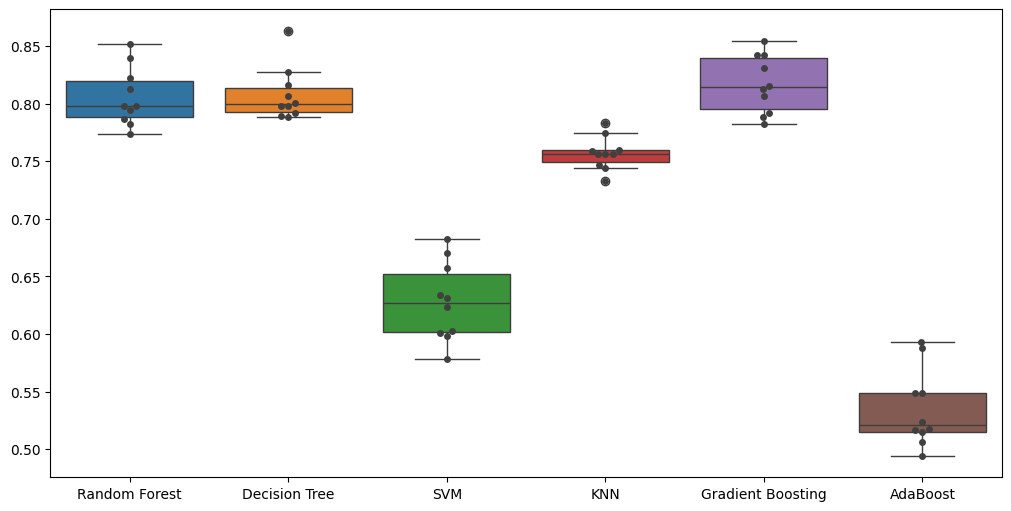

In [ ]:
# criação do daframe e gráfico boxplot
df = pd.DataFrame(dict(zip(modelos.keys(), scores)))
fig10, ax10 = plt.subplots(figsize=(10,5),constrained_layout=True )
sns.boxplot(data=df, ax=ax10)
sns.swarmplot(data=df, color=".25", ax=ax10)

# Hyperparametros

In [ ]:
modelo_escolhido = GradientBoostingClassifier(random_state=seed, n_estimators=100, learning_rate=0.1, max_depth=3)
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', modelo_escolhido)])

parametros = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 4, 5],
}

modelo = GridSearchCV(estimator=pipeline, param_grid=parametros, cv=kfold)
modelo.fit(X, y)
melhor_modelo = modelo.best_estimator_

In [ ]:
melhor_modelo

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['Código Terceiro',
                                                   'numero_dia_acordada',
                                                   'Terceiro Centralizador',
                                                   'faixa_de_peso']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('target_encoder',
                                                                   TargetEncoder())]),
                                                  ['LINHA', 'Cidade', 'UF'])])),
                ('classifier',
                 GradientBoostingClassifier(max_depth=4, random_state=10))])

In [ ]:
print('A acurácia do modelo é: %.2f%%' % (melhor_modelo.score(X,y) *100))

A acurácia do modelo é: 86.54%


# Documentação

# Treinamento e Reciclagem